# 6501 Capstone Group 4  
## GAN Generated Data Visualization
by Hao Ning
using google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")
#changing the working directory to my kaggle folder
%cd /content/drive/My Drive/Kaggle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import tensorflow as tf

Mounted at /content/drive
/content/drive/My Drive/Kaggle


In [ ]:
df_raw = pd.read_csv('creditcard.csv')
df_raw.shape

(284807, 31)

In [ ]:
# make the transformation, time transformed from sec to hour
df_raw['Amount'] = np.log10( df_raw['Amount'].values + 1 )
df_raw['Time'] = df_raw['Time'].values/3600 
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.177883,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.567026,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,2.579395,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.095169,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1.851197,0


In [ ]:
from sklearn.model_selection import train_test_split

target = 'Class'

# Divide the training data into training (80%) and test (20%)
df_train, df_test = train_test_split(df_raw, train_size=0.8, random_state=42, stratify=df_raw[target])

# Reset the index
df_train, df_test  = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [ ]:
x_train = df_train.drop(target,axis=1)
y_train = df_train[target]
x_test = df_test.drop(target,axis=1)
y_test = df_test[target]
print(x_train.shape, y_train.shape)

(227845, 30) (227845,)


In [ ]:
x_train_fraud = x_train[y_train==1]
x_train_fraud.shape

(394, 30)

## Comparison of Generated Data Distribution

In [ ]:
# load model
latent_dim = 32
gan_G = tf.keras.models.load_model('./gan_generator.h5', compile=False)

In [ ]:
def gen_data(generator, n_data):
    noise = np.random.normal(0, 1, size=(n_data, latent_dim))
    gen = generator.predict(noise)
    x_train_gen = np.concatenate((x_train, gen))
    y_gen = np.array(gen.shape[0] * [1])
    y_train_gen = np.concatenate((y_train, y_gen))
    return gen, x_train_gen, y_train_gen  

In [ ]:
# generate 1000 more fraud
gen_1000, x_train_gen_1000, y_train_gen_1000 = gen_data(gan_G, 1000)
df_gen_1000 = pd.DataFrame(data=gen_1000, index=None, columns=x_train.columns)
df_gen_1000.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.389489,-0.979359,0.895996,-1.234874,1.290323,-0.355189,0.049950,-0.942294,0.074181,-0.565675,-0.755705,1.223826,-1.568203,0.026170,-1.534295,0.393946,-0.467764,-1.464300,-0.369044,-0.452892,0.103662,0.017868,-0.618777,0.171721,-0.222605,-0.092507,-0.503067,0.045079,0.261785,0.031816
std,0.813018,0.263607,0.295188,0.374062,0.379046,0.265180,0.257887,0.367989,0.252891,0.319126,0.342283,0.382928,0.445497,0.284683,0.418137,0.236815,0.291985,0.359060,0.203675,0.242430,0.207088,0.185643,0.318777,0.281618,0.245838,0.282177,0.217256,0.232566,0.302987,0.215120
min,1.498064,-2.135427,0.174968,-2.681553,0.165588,-1.288573,-0.740107,-2.422235,-0.759833,-1.719825,-2.044956,0.209955,-3.486515,-1.011824,-3.166612,-0.211415,-1.627273,-2.546145,-1.096393,-1.275694,-0.671649,-0.514568,-1.634301,-0.845238,-0.995542,-0.874990,-1.278991,-0.904841,-0.746939,-0.586152
25%,2.798437,-1.149058,0.692156,-1.476551,1.024525,-0.527248,-0.112311,-1.178464,-0.092388,-0.776968,-0.983328,0.953209,-1.835077,-0.155609,-1.787168,0.234691,-0.655221,-1.698072,-0.499255,-0.621978,-0.032016,-0.105143,-0.829557,-0.012119,-0.397869,-0.286678,-0.642076,-0.105180,0.068718,-0.110518
50%,3.326804,-0.965155,0.879796,-1.208105,1.256518,-0.345276,0.044166,-0.917379,0.073815,-0.544827,-0.731556,1.200407,-1.526231,0.044695,-1.515972,0.382558,-0.448105,-1.435332,-0.363309,-0.447963,0.102529,0.012038,-0.609444,0.163316,-0.214228,-0.093970,-0.499802,0.048184,0.263875,0.032600
75%,3.899409,-0.793367,1.081204,-0.962993,1.536846,-0.173011,0.211687,-0.676349,0.239347,-0.333100,-0.510292,1.475450,-1.250576,0.210732,-1.241314,0.528815,-0.264792,-1.204900,-0.225356,-0.279622,0.230598,0.133479,-0.384295,0.354434,-0.055424,0.093225,-0.353143,0.202757,0.467883,0.175256
max,6.288271,-0.319575,1.913371,-0.305451,2.634101,0.362181,1.031053,0.034167,0.980592,0.337389,0.076115,2.820519,-0.496023,0.926602,-0.625898,1.251824,0.349591,-0.618377,0.183913,0.211752,0.903639,0.661380,0.201197,1.299238,0.542190,0.822113,0.128053,0.730155,1.264011,0.680505


In [ ]:
wgan_G = tf.keras.models.load_model('./wgan_generator.h5', compile=False)
gen_1000wgan, x_train_gen_1000wgan, y_train_gen_1000wgan = gen_data(wgan_G, 1000)
df_gen_1000wgan = pd.DataFrame(data=gen_1000wgan, index=None, columns=x_train.columns)
df_gen_1000wgan.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.044483,-6.313400,10.348771,-8.584782,8.336588,-9.008382,-4.654655,-11.372082,0.221284,-7.755846,-10.001351,10.349868,-10.609360,-0.064500,-9.558506,-0.136174,-9.749672,-11.051406,-7.629999,0.900988,0.969424,-0.023673,0.004411,-0.070005,-0.090345,-0.025986,0.126037,0.176275,0.100445,3.417834
std,2.697857,1.362734,2.318763,1.939543,1.922340,2.008279,1.094329,2.565580,0.303495,1.790745,2.267704,2.378126,2.368598,0.366727,2.201832,0.330028,2.170616,2.480187,1.699032,0.280442,0.356215,0.296408,0.381597,0.359611,0.307435,0.376241,0.262318,0.342770,0.394598,0.811458
min,5.016133,-11.154398,4.055800,-15.642079,2.979911,-16.095463,-9.472894,-20.798086,-0.864147,-13.385361,-17.739008,4.116840,-19.462679,-1.523332,-17.766348,-1.683958,-17.725311,-20.097557,-13.858606,-0.080080,0.042065,-0.945598,-1.308337,-1.350867,-1.282511,-0.999694,-0.694269,-0.955681,-1.137829,1.324925
25%,10.127227,-7.188804,8.795382,-9.831037,7.027155,-10.271463,-5.342067,-12.882250,0.024228,-8.918460,-11.433570,8.721704,-12.133466,-0.299050,-10.903762,-0.334577,-11.202953,-12.651525,-8.701245,0.705848,0.714236,-0.215228,-0.241117,-0.301038,-0.296257,-0.277606,-0.037641,-0.055806,-0.163643,2.832983
50%,11.698616,-6.184133,10.100668,-8.384596,8.137457,-8.765594,-4.543390,-11.081771,0.219495,-7.556082,-9.809491,10.098805,-10.318333,-0.047913,-9.332408,-0.123911,-9.480981,-10.802565,-7.451916,0.884059,0.940383,-0.027621,-0.009553,-0.062283,-0.098713,-0.045743,0.110482,0.194430,0.139795,3.327128
75%,13.668374,-5.375093,11.873971,-7.246872,9.527746,-7.678521,-3.898959,-9.592227,0.427129,-6.477819,-8.405406,11.884088,-9.028749,0.187474,-8.030797,0.093063,-8.272286,-9.301794,-6.448691,1.076620,1.197636,0.156603,0.259445,0.182839,0.118270,0.200864,0.284931,0.414104,0.364206,3.916019
max,21.301493,-2.722284,18.279558,-3.340780,15.343982,-3.666208,-1.686792,-4.671306,1.243882,-3.200468,-3.860257,18.726179,-4.441118,0.980253,-3.887639,0.804059,-4.190172,-4.368247,-3.046638,2.206964,2.203370,1.201055,1.269124,1.086375,0.994732,1.483697,1.137795,1.306663,1.259628,6.379050


In [ ]:
# def boxplot_compare(df1, color1, df2, color2, title):
#   fig, ax = plt.subplots(figsize=(16,10))
#   bp1 = df1.boxplot(color=color1, showfliers=False)
#   bp2 = df2.boxplot(color=color2, showfliers=False)
#   ax.set_title(title)
#   plt.xticks(rotation=90)
#   plt.show()

In [ ]:
import matplotlib.patches as mpatches
def boxplot_compare(df1, color1, df2, color2, title, gan_legend):
  fig, ax = plt.subplots(figsize=(16,10))
  bp1 = df1.boxplot(color=color1, showfliers=False)
  bp2 = df2.boxplot(color=color2, showfliers=False)
  patch1 = mpatches.Patch(color=color1, label='Original')
  patch2 = mpatches.Patch(color=color2, label=gan_legend)
  plt.legend(handles=[patch1, patch2], prop={'size': 16})
  ax.set_title(title)
  plt.xticks(rotation=90)
  plt.show()

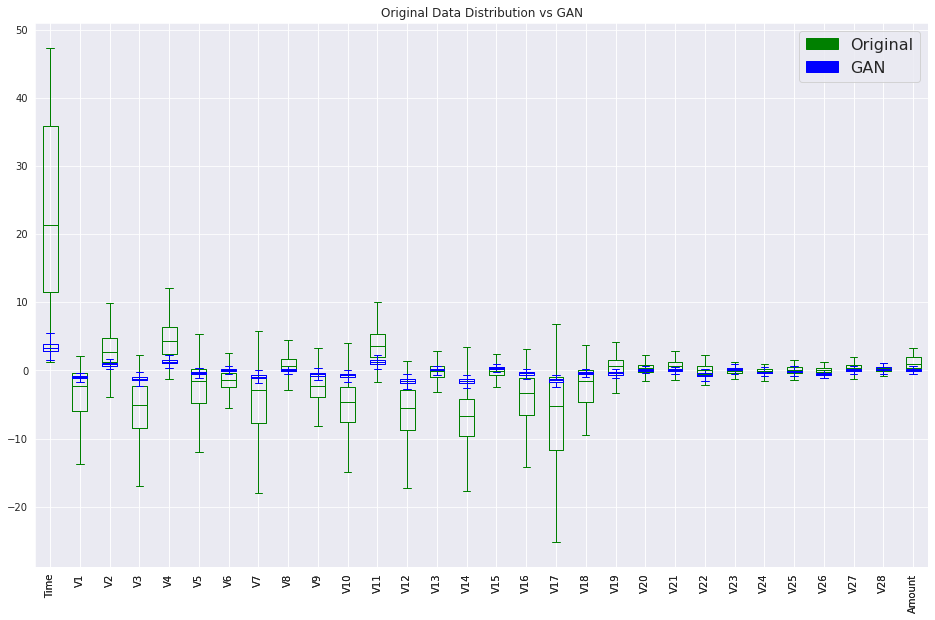

In [ ]:
boxplot_compare(x_train_fraud, 'green', df_gen_1000, 'blue', 'Original Data Distribution vs GAN', 'GAN')

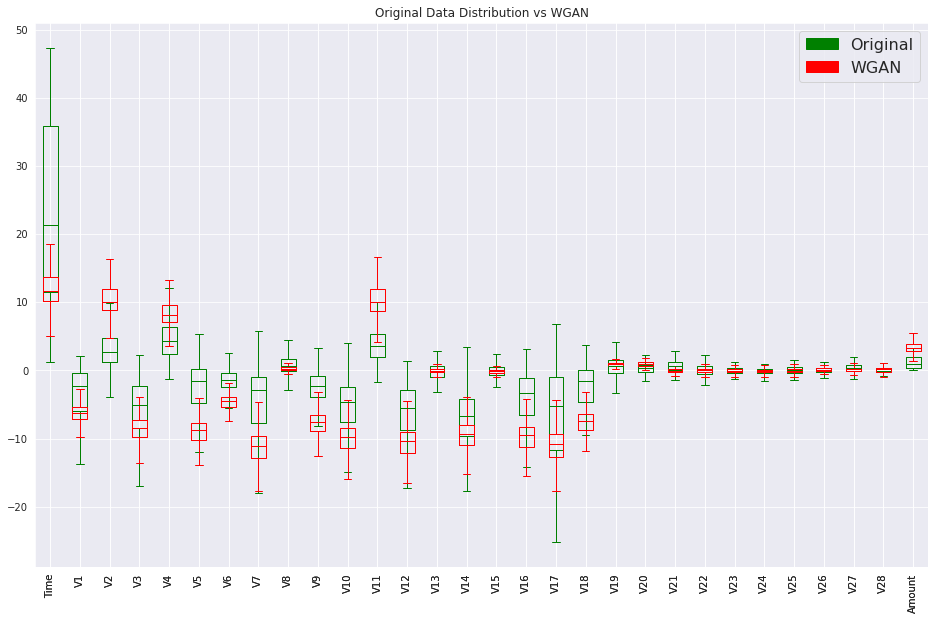

In [ ]:
boxplot_compare(x_train_fraud, 'green', df_gen_1000wgan, 'red', 'Original Data Distribution vs WGAN', 'WGAN')